In [288]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv
from sklearn import metrics
from sklearn.model_selection import train_test_split
import csv
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## loading data

In [56]:
df = pd.read_csv('data/train.csv')

In [57]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [58]:
df.shape

(1460, 81)

In [59]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [60]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## dealing with missing data 

In [157]:
# count the number of columns of type object 
object_columns = df.columns[df.dtypes=='object'].tolist()
object_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [62]:
df.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [63]:
# display the columns that contain missing data 
columns_nan = df.columns[df.isnull().sum() > 0].tolist()
columns_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [64]:
# remove columns with nan values 
df.drop(df[columns_nan],axis=1,inplace=True)

In [65]:
df.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 62 columns]

In [67]:
df.describe(include='all')

Id   MSSubClass MSZoning        LotArea Street LotShape  \
count   1460.000000  1460.000000     1460    1460.000000   1460     1460   
unique          NaN          NaN        5            NaN      2        4   
top             NaN          NaN       RL            NaN   Pave      Reg   
freq            NaN          NaN     1151            NaN   1454      925   
mean     730.500000    56.897260      NaN   10516.828082    NaN      NaN   
std      421.610009    42.300571      NaN    9981.264932    NaN      NaN   
min        1.000000    20.000000      NaN    1300.000000    NaN      NaN   
25%      365.750000    20.000000      NaN    7553.500000    NaN      NaN   
50%      730.500000    50.000000      NaN    9478.500000    NaN      NaN   
75%     1095.250000    70.000000      NaN   11601.500000    NaN      NaN   
max     1460.000000   190.000000      NaN  215245.000000    NaN      NaN   

       LandContour Utilities LotConfig LandSlope  ... EnclosedPorch  \
count         1460      1460      1460      1460  ...   1460.000000   
unique           4         2         5         3  ...           NaN   
top            Lvl    AllPub    Inside       Gtl  ...           NaN   
freq          1311      1459      1052      1382  ...           NaN   
mean           NaN       NaN       NaN       NaN  ...     21.954110   
std            NaN       NaN       NaN       NaN  ...     61.119149   
min            NaN       NaN       NaN       NaN  ...      0.000000   
25%            NaN       NaN       NaN       NaN  ...      0.000000   
50%            NaN       NaN       NaN       NaN  ...      0.000000   
75%            NaN       NaN       NaN       NaN  ...      0.000000   
max            NaN       NaN       NaN       NaN  ...    552.000000   

          3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count   1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
unique          NaN          NaN          NaN           NaN          NaN   
top             NaN          NaN          NaN           NaN          NaN   
freq            NaN          NaN          NaN           NaN          NaN   
mean       3.409589    15.060959     2.758904     43.489041     6.321918   
std       29.317331    55.757415    40.177307    496.123024     2.703626   
min        0.000000     0.000000     0.000000      0.000000     1.000000   
25%        0.000000     0.000000     0.000000      0.000000     5.000000   
50%        0.000000     0.000000     0.000000      0.000000     6.000000   
75%        0.000000     0.000000     0.000000      0.000000     8.000000   
max      508.000000   480.000000   738.000000  15500.000000    12.000000   

             YrSold  SaleType  SaleCondition      SalePrice  
count   1460.000000      1460           1460    1460.000000  
unique          NaN         9              6            NaN  
top             NaN        WD         Normal            NaN  
freq            NaN      1267           1198            NaN  
mean    2007.815753       NaN            NaN  180921.195890  
std        1.328095       NaN            NaN   79442.502883  
min     2006.000000       NaN            NaN   34900.000000  
25%     2007.000000       NaN            NaN  129975.000000  
50%     2008.000000       NaN            NaN  163000.000000  
75%     2009.000000       NaN            NaN  214000.000000  
max     2010.000000       NaN            NaN  755000.000000  

[11 rows x 62 columns]

## viz and insights

In [70]:
# visualize the categories num in some categorcal features like LotShape
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

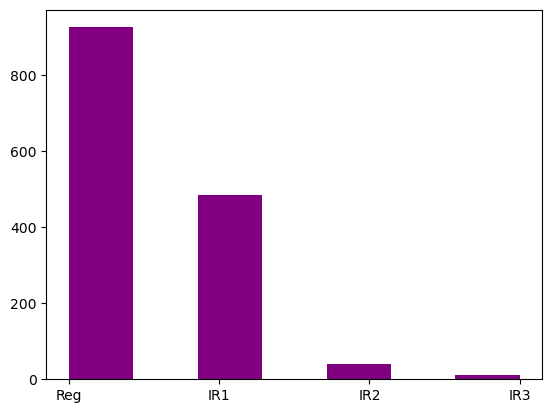

In [106]:
# using countplot to visulaize it 
plt.hist(df['LotShape'],bins=7,color='purple')
plt.show()

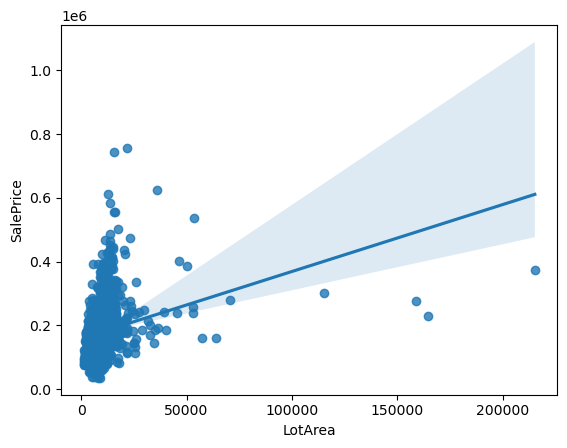

In [110]:
sns.regplot(x=df['LotArea'],y=df['SalePrice'])
plt.show()

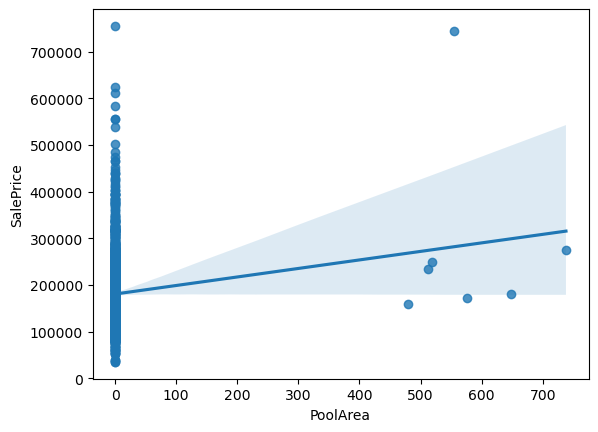

In [112]:
sns.regplot(x=df['PoolArea'],y=df['SalePrice'])
plt.show()

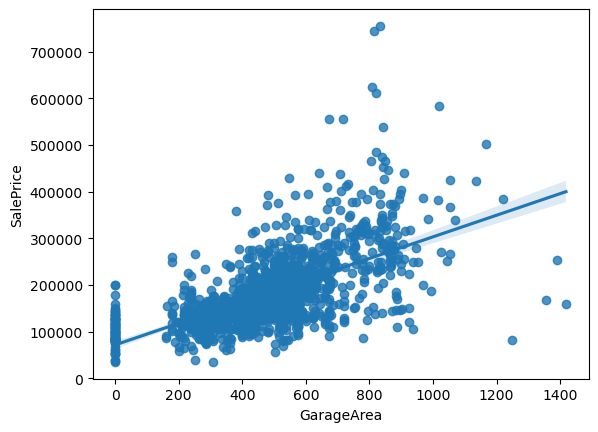

In [113]:
sns.regplot(x=df['GarageArea'],y=df['SalePrice'])
plt.show()

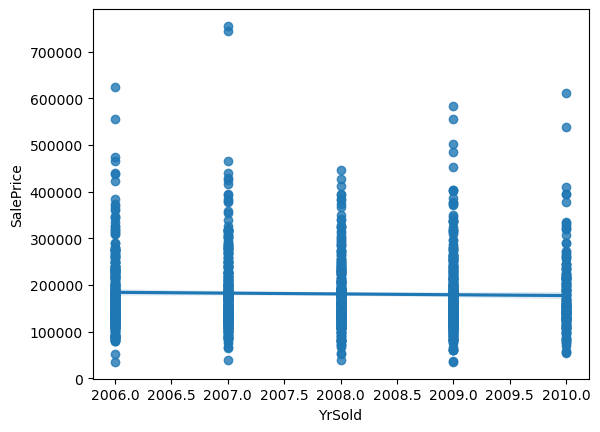

In [116]:
sns.regplot(x=df['YrSold'],y=df['SalePrice'])
plt.show()

In [121]:
# trying with pearson correlation using stats and p-values
p_corr , p_value = stats.pearsonr(x=df['GarageArea'],y=df['SalePrice'])
p_corr;p_value
if p_value < .0001:
    print('strong relation')

strong relation


## one hot encoding - turnning categorical vars to numeric values 

In [175]:
# we will use get_dummies() to turn categories into numericals for all objects_columns
df[[object_columns[7],'SalePrice']].groupby(object_columns[7], as_index=False).mean()

Neighborhood      SalePrice
0       Blmngtn  194870.882353
1       Blueste  137500.000000
2        BrDale  104493.750000
3       BrkSide  124834.051724
4       ClearCr  212565.428571
5       CollgCr  197965.773333
6       Crawfor  210624.725490
7       Edwards  128219.700000
8       Gilbert  192854.506329
9        IDOTRR  100123.783784
10      MeadowV   98576.470588
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
14       NWAmes  189050.068493
15      NoRidge  335295.317073
16      NridgHt  316270.623377
17      OldTown  128225.300885
18        SWISU  142591.360000
19       Sawyer  136793.135135
20      SawyerW  186555.796610
21      Somerst  225379.837209
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273

In [176]:
df_dummies = pd.get_dummies(df[object_columns])
df_dummies

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1455                 0            0            0            1            0   
1456                 0            0            0            1            0   
1457                 0            0            0            1            0   
1458                 0            0            0            1            0   
1459                 0            0            0            1            0   

      Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0               0            1             0             0             0  ...   
1               0            1             0             0             0  ...   
2               0            1             1             0             0  ...   
3               0            1             1             0             0  ...   
4               0            1             1             0             0  ...   
...           ...          ...           ...           ...           ...  ...   
1455            0            1             0             0             0  ...   
1456            0            1             0             0             0  ...   
1457            0            1             0             0             0  ...   
1458            0            1             0             0             0  ...   
1459            0            1             0             0             0  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                         0                      0                     0   
1                         0                      0                     0   
2                         0                      0                     0   
3                         1                      0                     0   
4                         0                      0                     0   
...                     ...                    ...                   ...   
1455                      0                      0                     0   
1456                      0                      0                     0   
1457                      0                      0                     0   
1458                      0                      0                     0   
1459                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                        0                     1                      0  
1                        0                     1                      0  
2                        0                     1                      0  
3                        0                     0                      0  
4                        0      

In [177]:
# then merge the dummy_columns to the orginal data 
df_merged = pd.concat([df,df_dummies],axis='columns')
df_merged

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... SaleType_ConLw SaleType_New  \
0       AllPub    Inside       Gtl  ...              0            0   
1       AllPub       FR2       Gtl  ...              0            0   
2       AllPub    Inside       Gtl  ...              0            0   
3       AllPub    Corner       Gtl  ...              0            0   
4       AllPub       FR2       Gtl  ...              0            0   
...        ...       ...       ...  ...            ...          ...   
1455    AllPub    Inside       Gtl  ...              0            0   
1456    AllPub    Inside       Gtl  ...              0            0   
1457    AllPub    Inside       Gtl  ...              0            0   
1458    AllPub    Inside       Gtl  ...              0            0   
1459    AllPub    Inside       Gtl  ...              0            0   

     SaleType_Oth SaleType_WD SaleCondition_Abnorml  SaleCondition_AdjLand  \
0               0           1                     0                      0   
1               0           1                     0                      0   
2               0           1                     0                      0   
3               0           1                     1                      0   
4               0           1                     0                      0   
...           ...         ...                   ...                    ...   
1455            0           1                     0                      0   
1456            0           1                     0                      0   
1457            0           1                     0                      0   
1458            0           1                     0                      0   
1459            0           1                     0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1455                     0                     0                     1   
1456                     0                     0                     1   
1457                     0                     0                     1   
1458                     0                     0                     1   
1459                     0                     0                     1   

     SaleCondition_Partial  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1455                     0  
1456                     0  
1457                     0  
1458                     0  
1459                     0  

[1460 rows x 244 columns]

In [178]:
# then remove the original object columns 
df_merged.drop(object_columns,axis=1,inplace=True)
df_merged

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0             2003         706           0        150  ...               0   
1             1976         978           0        284  ...               0   
2             2002         486           0        434  ...               0   
3             1970         216           0        540  ...               0   
4             2000         655           0        490  ...               0   
...            ...         ...         ...        ...  ...             ...   
1455          2000           0           0        953  ...               0   
1456          1988         790         163        589  ...               0   
1457          2006         275           0        877  ...               0   
1458          1996          49        1029          0  ...               0   
1459          1965         830         290        136  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                    

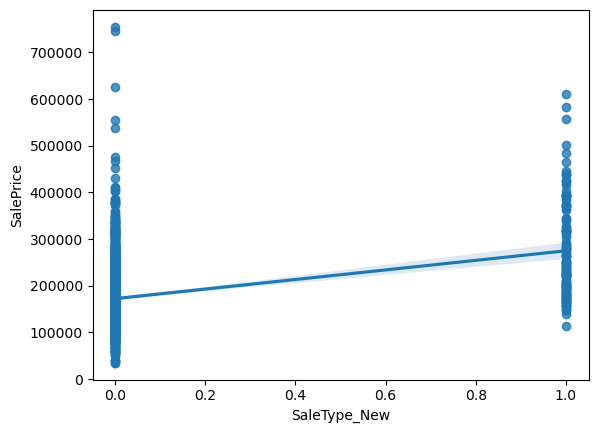

In [183]:
# check for columns relations 
sns.regplot(x=df_merged['SaleType_New'],y=df_merged['SalePrice'])
plt.show()

In [195]:
# finding correlations between vars with new merged data 
df_merged.corr()['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
                       ...   
MSZoning_RM         -0.288065
HeatingQC_TA        -0.312677
Foundation_CBlock   -0.343263
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 217, dtype: float64

In [225]:
# so we will take 5 features from the smallest and 15 features of the largest features 
# finding correlations between vars with new merged data 
# small_corr = df_merged.corr()['SalePrice'].sort_values(ascending=False).nsmallest(5)
large_corr = df_merged.corr()['SalePrice'].sort_values(ascending=False).nlargest(20)
cm = np.corrcoef(df_merged[large_corr.index].values.T) # create 2d values to be able to drawn as heatmap 

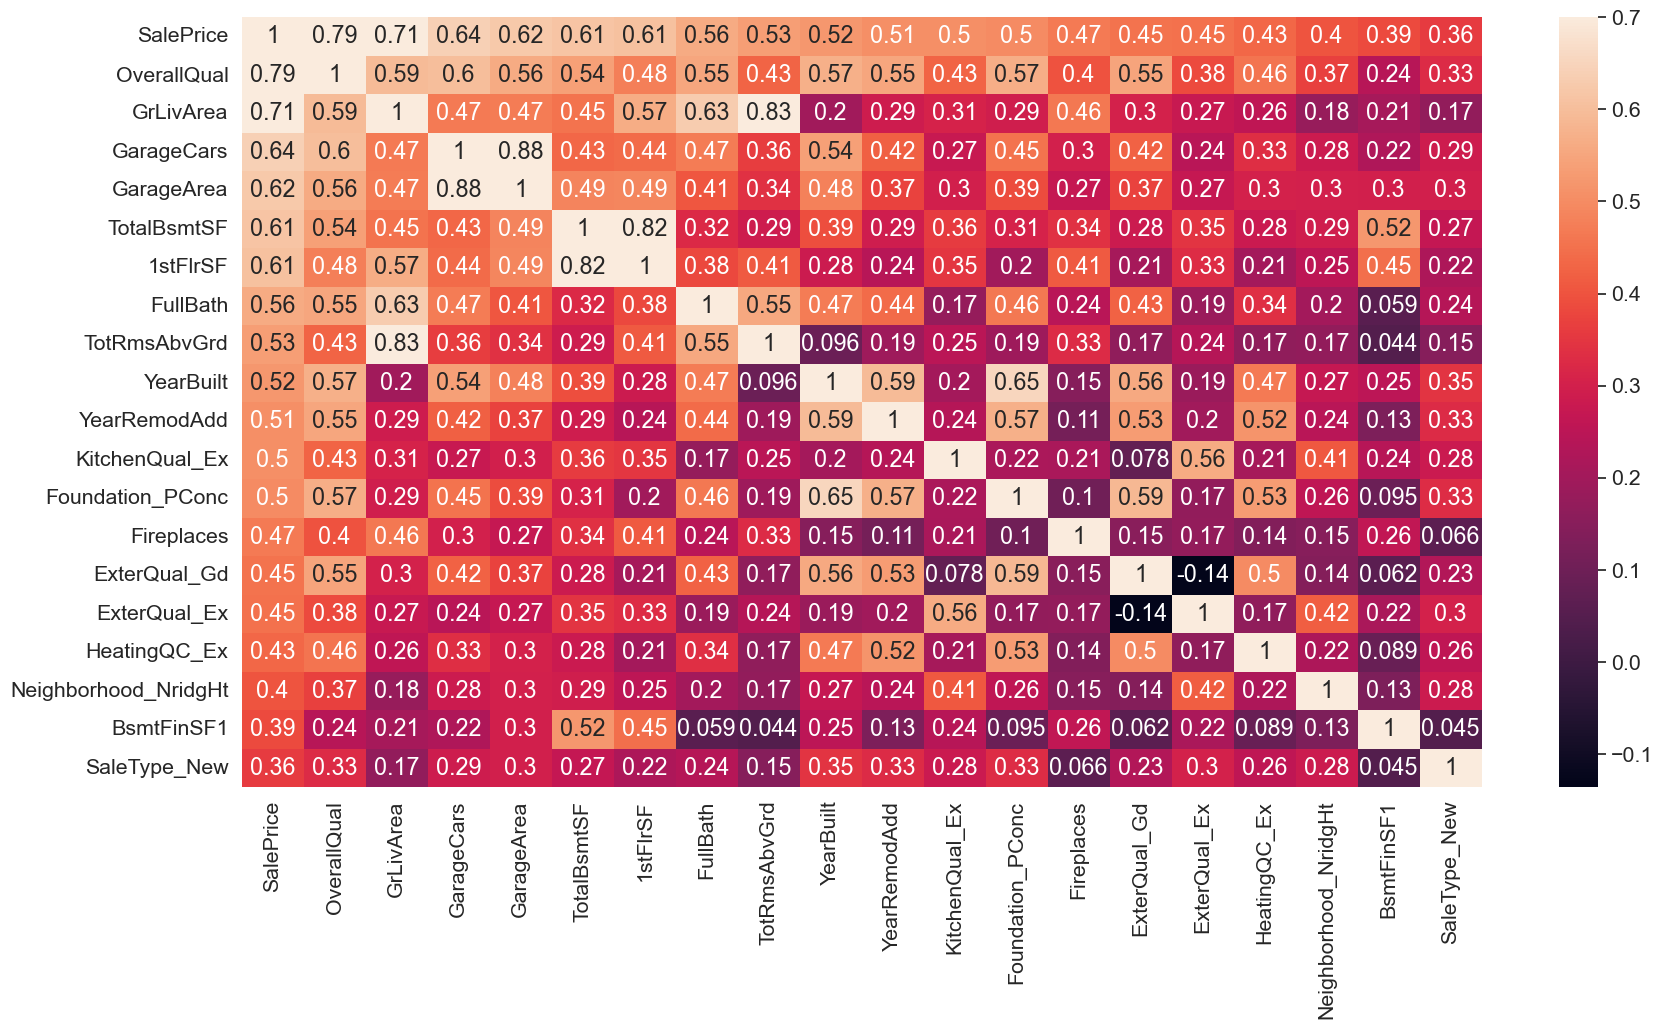

In [239]:
# for only the 20th largest features correlations
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,xticklabels=large_corr.index,yticklabels=large_corr.index,vmax=.7)
plt.show()

## Normalize And Standardize Data 

In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
data = df_merged[selected_columns]
data.head()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  KitchenQual_Ex  \
0       856         2             8       2003          2003               0   
1      1262         2             6       1976          1976               0   
2       920         2             6       2001          2002               0   
3       961         1             7       1915          1970               0   
4      1145         2             9       2000          2000               0   

   Foundation_PConc  Fireplaces  ExterQual_Gd  ExterQual_Ex  HeatingQC_Ex  \
0                 1           0             1             0             1   
1                 0           1             0             0             1   
2                 1           1             1             0             1   
3                 0           1             0             0             0   
4                 1           1             1             0             1   

   Neighborhood_NridgHt  BsmtFinSF1  SaleType_New  
0                     0         706             0  
1                     0         978             0  
2                     0         486             0  
3                     0         216             0  
4                     0         655             0

In [251]:
data.shape

(1460, 20)

In [270]:
# normalize each dep_features and indep_feature
x = data.drop('SalePrice',axis=1)
y = data['SalePrice']

# transform x
scale_x = StandardScaler()
scale_x.fit(x)
scale_x = scale_x.transform(x)

In [267]:
# transform y
y = np.array(y).reshape(-1,1)
scale_y = StandardScaler()
scale_y.fit(y)
scale_y = scale_y.transform(y)

In [271]:
print(scale_y.shape)
print(scale_x.shape)

(1460, 1)
(1460, 19)


## Splitting Data 

In [272]:
# split data with train_test_split
x_train , x_test , y_train , y_test = train_test_split(scale_x,scale_y,test_size=.2,random_state=42)

## Modeling - Predict

In [276]:
# init models 
from sklearn.linear_model import LinearRegression , Ridge
LR = LinearRegression()
RDL = Ridge(alpha=.1)

### LR Modeling 

In [279]:
# apply linear regression model 
LR.fit(x_train,y_train)
print(f"R^2 Score Train LR : {LR.score(x_train,y_train)}")

R^2 Score Train LR : 0.8035395562992976


In [283]:
# prediction on LR 
from sklearn.metrics import mean_squared_error , r2_score
lr_pred = LR.predict(x_test)
print(f"R^2 Score Test LR : {r2_score(y_test,lr_pred)}")

R^2 Score Test LR : 0.8406299156609773


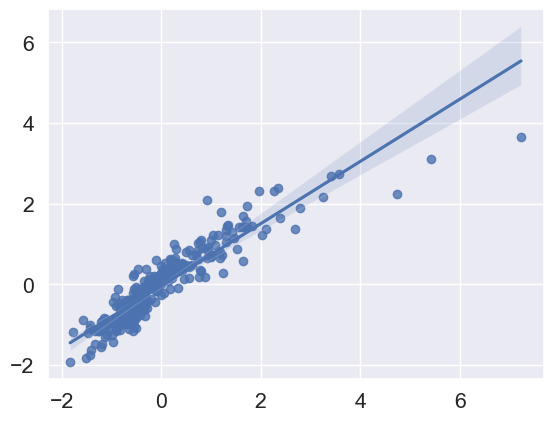

In [284]:
# regplot between predicted and actual values for test data
sns.regplot(x=y_test,y=lr_pred)
plt.show()

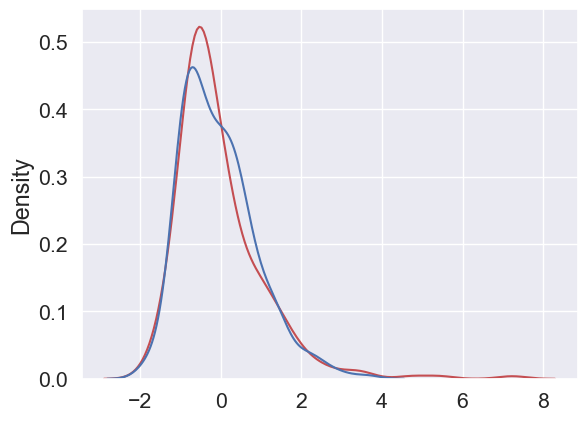

In [289]:
# distribution plot between predicted values and actual values blue -> predicted , red -> actual
ax1 = sns.distplot(y_test,color='r',hist=False,label='Actual Value')
sns.distplot(lr_pred,color='b',hist=False,label='Fitted Values',ax=ax1)
plt.show();

### Ridge Modeling

In [300]:
RDL.fit(x_train,y_train)
print(f"R^2 Score Train RDL : {RDL.score(x_train,y_train)}")

R^2 Score Train RDL : 0.8035395562992942


In [301]:
rdl_pred = RDL.predict(x_test)
print(f"R^2 Score Test RDL : {r2_score(y_test,rdl_pred)}")

R^2 Score Test RDL : 0.8406299098381229


### Random Forest Modeling

In [302]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)

RandomForestRegressor()

In [303]:
rdf.score(x_train,y_train)

0.9790544310412262

In [304]:
rdf_pred = rdf.predict(x_test)
print(f"R^2 Score Test RDF : {r2_score(y_test,rdf_pred)}")

R^2 Score Test RDF : 0.8929369375768823


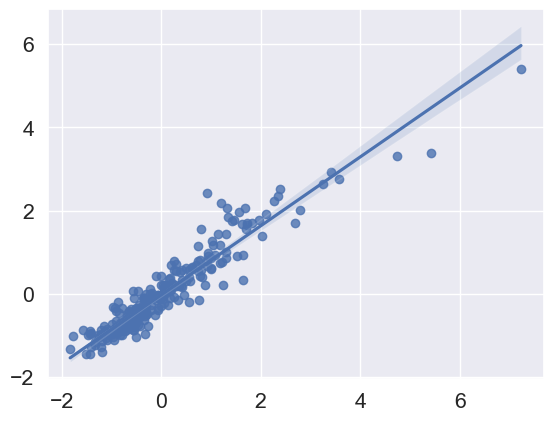

In [305]:
# regplot between predicted and actual values for test data
sns.regplot(x=y_test,y=rdf_pred)
plt.show()

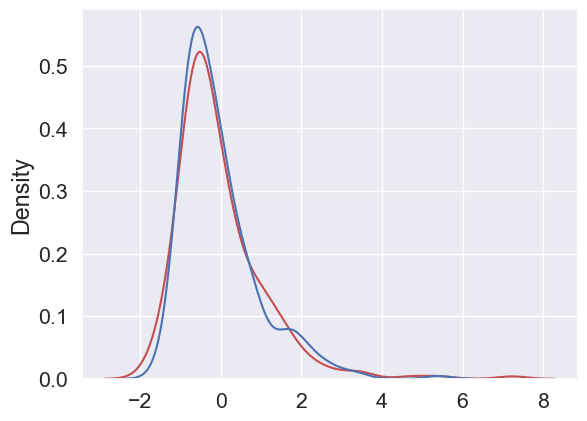

In [306]:
# distribution plot between predicted values and actual values blue -> predicted , red -> actual
ax1 = sns.distplot(y_test,color='r',hist=False,label='Actual Value')
sns.distplot(rdf_pred,color='b',hist=False,label='Fitted Values',ax=ax1)
plt.show();